# Linear Classifier

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [3]:
samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [8]:
targets = np.vstack((np.zeros((samples_per_class, 1), dtype="float32"), np.ones((samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

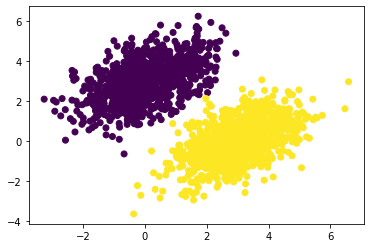

In [9]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [10]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [11]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [12]:
def square_loss(targets, predictions):
    
    per_sample_losses = tf.square(targets - predictions)
    
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [13]:
learning_rate = 0.1

def training_step(inputs, targets):
    
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    return loss

**The batch training loop**

In [14]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.9575
Loss at step 1: 0.8976
Loss at step 2: 0.2553
Loss at step 3: 0.1613
Loss at step 4: 0.1397
Loss at step 5: 0.1282
Loss at step 6: 0.1189
Loss at step 7: 0.1105
Loss at step 8: 0.1029
Loss at step 9: 0.0960
Loss at step 10: 0.0896
Loss at step 11: 0.0839
Loss at step 12: 0.0786
Loss at step 13: 0.0738
Loss at step 14: 0.0695
Loss at step 15: 0.0655
Loss at step 16: 0.0618
Loss at step 17: 0.0585
Loss at step 18: 0.0555
Loss at step 19: 0.0528
Loss at step 20: 0.0502
Loss at step 21: 0.0480
Loss at step 22: 0.0459
Loss at step 23: 0.0440
Loss at step 24: 0.0422
Loss at step 25: 0.0407
Loss at step 26: 0.0392
Loss at step 27: 0.0379
Loss at step 28: 0.0367
Loss at step 29: 0.0356
Loss at step 30: 0.0346
Loss at step 31: 0.0337
Loss at step 32: 0.0329
Loss at step 33: 0.0321
Loss at step 34: 0.0315
Loss at step 35: 0.0308
Loss at step 36: 0.0303
Loss at step 37: 0.0297
Loss at step 38: 0.0293
Loss at step 39: 0.0288


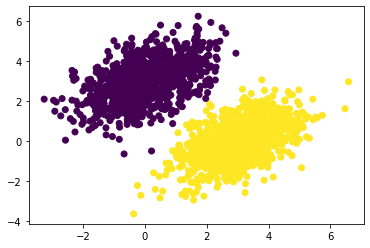

In [15]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

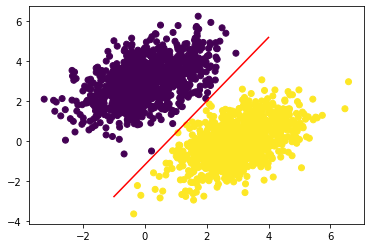

In [16]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)